# **Penerapan Algoritma Dynamic Programming Pada Knapsack Problem Untuk Optimasi Maksimasi Keuntungan Dalam Sebuah Pengiriman Barang**

---

**Kelompok 6 (RB)**
1.   Arfyani Deiastuti(120450006)
2.   Akbar Fadhillah I.U. (120450026)
3.   Ribka Gabriela S. (120450108)
4.   Sophia Yolanda RI (120450008)
5.   Angga Pramana P. (120450084)

# **Data Wringling - Data Visualization - Data Processing**

**Import Data**

In [1]:
import pandas as pd   # import pandas menjadi pd
import numpy as np    # import numpy menjadi np                  

In [2]:
# import data dari url yang ada menjadi df 
url = 'https://drive.google.com/file/d/1q2kygbNE1sdm6_94PWb3n7U3NRcHKHmR/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)       # mendefinisikan variabel df yaitu dengan fungsi read() untuk membaca file dari Data_Shoes
data = pd.DataFrame(df)     # mendefinisikan variabel data dari df dengan fungsi dataframe() 
data.head()                 # Memanggil data dari data teratas

,Name,Type,Price,Midsole Drop(mm),Weight(g)
0,Addiction 14,Men's,130.00,12,357.2
1,Adrenaline GTS 20,Men's,130.00,12,300.5
2,Anthem 3,Men's,69.95,10,212.6
3,Asteria,Men's,110.00,8,235.3
4,Beast 20,Men's,160.00,12,331.7


In [3]:
data.rename(columns = {'Weight(g)':'Weight'}, inplace=True)
data = data[['Price','Weight']]

In [4]:
data.sum() # Menampilkan semua penjumlahan dari semua kolom

Price      6034.4
Weight    12737.3
dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   48 non-null     float64
 1   Weight  48 non-null     float64
dtypes: float64(2)
memory usage: 896.0 bytes


In [6]:
# Menghitung mean, median, standar deviasi, dll dari Kolom Price dan Weight
data.describe()

,Price,Weight
count,48.000000,48.000000
mean,125.716667,265.360417
std,31.617932,43.060066
min,69.950000,161.600000
25%,100.000000,237.400000
50%,130.000000,266.500000
75%,150.000000,292.700000
max,250.000000,357.200000


**Visualisasi Data**

In [7]:
# Import Library Matplotlib dan Seaborn untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

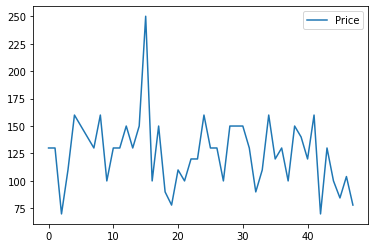

In [8]:
#Visualisasi Price dengan Line Chart
plt.plot(data['Price'],label='Price') # Melakukan ploting dengan data kolom Price dengan Label price
plt.legend();

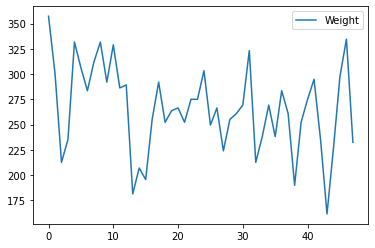

In [9]:
#Visualisasi Weight dengan Line Chart
plt.plot(data['Weight'],label='Weight') # Melakukan ploting dengan data kolo weight dengan label Weight
plt.legend();

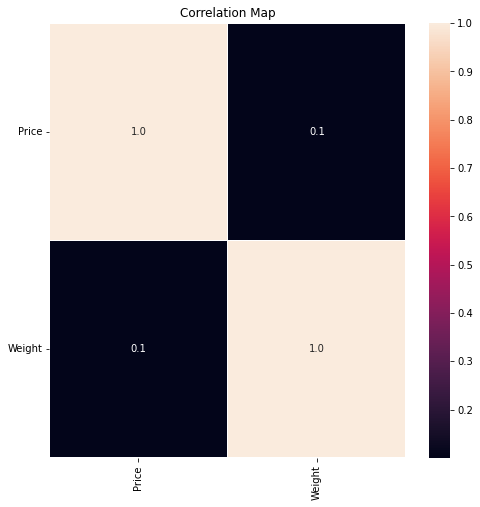

In [10]:
#Menampilkan Matriks Korelasi antara Price dengan Weight
f,ax=plt.subplots(figsize = (8,8))
# corr() is actually pearson correlation
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map') # Membuat judul plot
plt.show() # Menampilkan Hasil Ploting

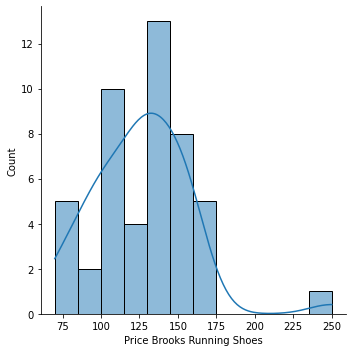

In [11]:
# Visualisasi Price dengan Digaram Batang
data1 = data['Price'] # Mengambil data dari data yang telah di defenisikan dengan kolom Price
sns.displot(data1, kde=True,bins=12) # Melakuakan Ploting dengan Jumlah diagram batang sebanyak 12
plt.xlabel('Price Brooks Running Shoes') # Membuat Label Plot
plt.show();# Menampilkan Ploting

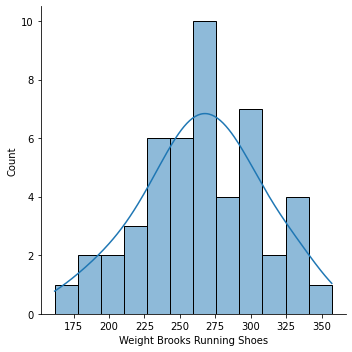

In [12]:
# Visualisasi Weight dengan Digaram Batang
data2 = data['Weight'] # Mengambil data dari data yang telah di defenisikan dengan kolom Weight
sns.displot(data2, kde=True, bins=12) # Melakuakan Ploting dengan Jumlah diagram batang sebanyak 12
plt.xlabel('Weight Brooks Running Shoes') # Membuat Label Plot
plt.show(); # Menampilkan Ploting

# **Algoritma Dynamic Programming**

In [13]:
vals = df['Price'].astype(int)
wts = df['Weight'].astype(int)
capacity = 8000

In [14]:
# Membuat tabel menggunakan (list comprehension)
w, h = capacity + 1, len(vals)

table = [[0 for x in range(w)] for y in range(h)]
print(table)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
w, h

(8001, 48)

In [16]:
# Iterasi Pertama pada sebuah items (rows)
# Iterasi kedua pada kolom yang merupakan representasi dari weights

for index in range(len(vals)):
    for weight in range(w):
        # Jika items weight lebih besar dari pada kapasitasanya maka pilih nilai tersebut sebagai solusi dari masalah
        if wts[index] > weight:
            table[index][weight] = table[index - 1][weight]
            continue
        
        # Jika nilai dari item < kapasitas
        prior_value = table[index - 1][weight]
        # Nilai item saat ini  + nilai dari sisa weight
        new_option_best = vals[index] + table[index - 1][weight - wts[index]]
        table[index][weight] = max(prior_value, new_option_best)

In [17]:
solution_arr = []

for x in table:
    for y in x:
        solution_arr.append(y)

In [18]:
print(max(solution_arr))

4310


In [19]:
max([x for y in table for x in y])

4310

In [20]:
list(range(len(vals)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47]